download from BIL repository

```
https://download.brainimagelibrary.org/d9/01/d901fb2108458eca/rr30a/
```

requires

```
pip install beautifulsoup4
```

In [36]:
import os
import requests
import io
import numpy as np
import pandas as pd
import tifffile
from bs4 import BeautifulSoup

In [32]:
def printResp(r):
    print(f'  status_code: {r.status_code}')
    
    # text will often be raw html, parse with BeautifulSoup
    #print(f'  text: {r.text}')
    
    print(f'  encoding: {r.encoding}')
    print(f"  headers['content-type']: {r.headers['content-type']}")
    
    print('    fetching content ...')
    content = r.content
    print('    ... got content')
    
    print(f'  len(content): {len(content)}')
    print(f'  type(content): {type(content)}')

In [39]:
# use beautiful soup to parse html

def myGetLinks(url):
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')

    printResp(r)

    # get src from all <A HREF
    #soup.find_all('a').get('href')
    ignoreList = ['./', '../']

    tifFileList = []
    txtFileList = []

    linkList = soup.find_all('a')
    for link in linkList:
        # link is type <class 'bs4.element.Tag'>
        href = link.get('href')
        if href in ignoreList:
            continue
        #print(href)
        if href.endswith('.tif'):
            tifFileList.append(href)
        if href.endswith('.txt'):
            txtFileList.append(href)
    
    #
    return tifFileList, txtFileList

In [43]:
# this endpoint is from a 16-digit BIL identifier.
# First 4-digits create two subfolders (2-digits each)
url = 'https://download.brainimagelibrary.org/d9/01/d901fb2108458eca/rr30a'

# this allows me to retreive name of folder 'rr30a'
#url = 'https://download.brainimagelibrary.org/d9/01/d901fb2108458eca'

tifFileList, txtFileList = myGetLinks(url)

  status_code: 200
  encoding: ISO-8859-1
  headers['content-type']: text/html
    fetching content ...
    ... got content
  len(content): 2945
  type(content): <class 'bytes'>


In [44]:
# load a line txt file using pandas

url = 'https://download.brainimagelibrary.org/d9/01/d901fb2108458eca/rr30a/line'
tifFileList, txtFileList = myGetLinks(url)

oneLineFile = txtFileList[0]
oneLineFilePath = os.path.join(path, oneLineFile)
print('oneLineFilePath:', oneLineFilePath)

df = pd.read_csv(oneLineFilePath)
print(df.head())

  status_code: 200
  encoding: ISO-8859-1
  headers['content-type']: text/html
    fetching content ...
    ... got content
  len(content): 17499
  type(content): <class 'bytes'>
oneLineFilePath: https://download.brainimagelibrary.org/d9/01/d901fb2108458eca/rr30a/line/rr30a_s0_c0.txt
   354  240  31
0  377  236  31
1  401  232  31
2  425  225  31
3  445  218  31
4  466  213  31


In [46]:

# get one tif, approximately 146.9 MB ... too slow ... I need to grab an image

url = 'https://download.brainimagelibrary.org/d9/01/d901fb2108458eca/rr30a'

tifFileList, txtFileList = myGetLinks(url)

oneTif = tifFileList[0]
oneTifPath = os.path.join(url, oneTif)

print('oneTifPath:', oneTifPath)

# using stream=True will get headers and defer content until it is accessed
r2 = requests.get(oneTifPath, stream=True)
printResp(r2)

ok = True
if ok:

    # tiff is a np.ndarray
    tiff = tifffile.imread(io.BytesIO(r2.content))
    

  status_code: 200
  encoding: ISO-8859-1
  headers['content-type']: text/html
    fetching content ...
    ... got content
  len(content): 2945
  type(content): <class 'bytes'>
oneTifPath: https://download.brainimagelibrary.org/d9/01/d901fb2108458eca/rr30a/rr30a_s0_ch1.tif
  status_code: 200
  encoding: None
  headers['content-type']: image/tiff
    fetching content ...
    ... got content
  len(content): 146883164
  type(content): <class 'bytes'>


<class 'numpy.ndarray'> (70, 1024, 1024) uint16


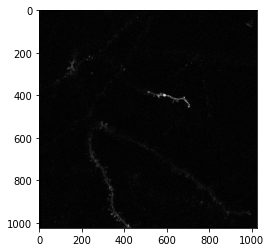

In [47]:
print(type(tiff), tiff.shape, tiff.dtype)
from matplotlib import pyplot as plt

oneSlice = tiff[20,:,:]

plt.imshow(oneSlice, cmap='gray')
plt.show()